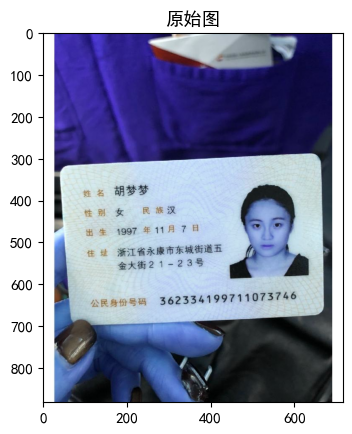

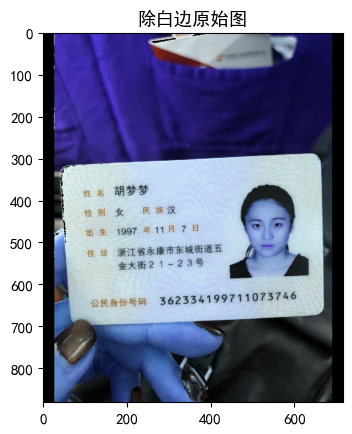

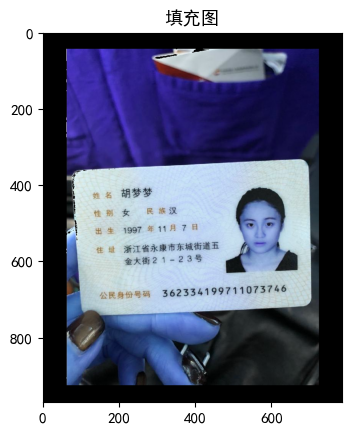

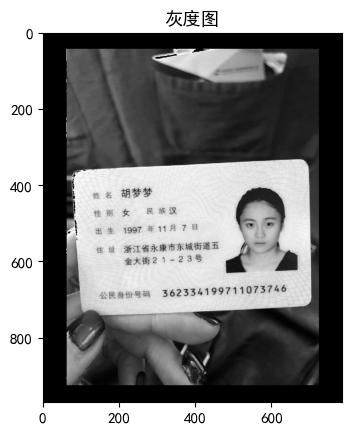

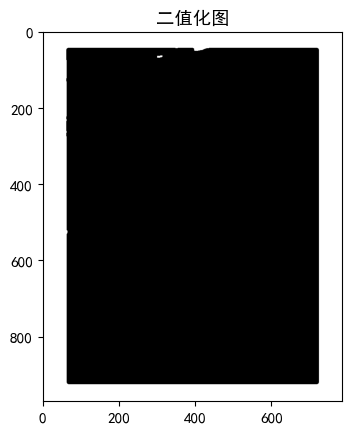

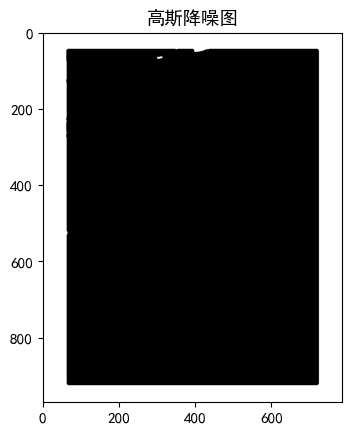

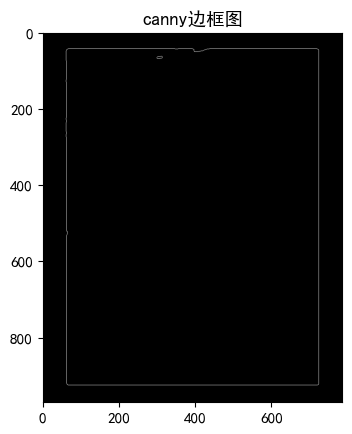

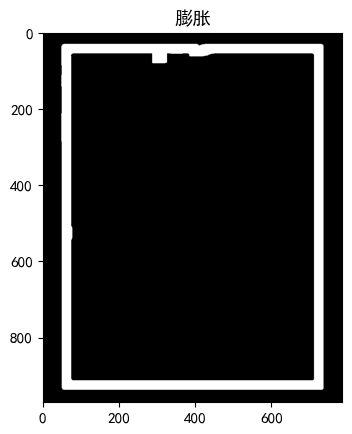

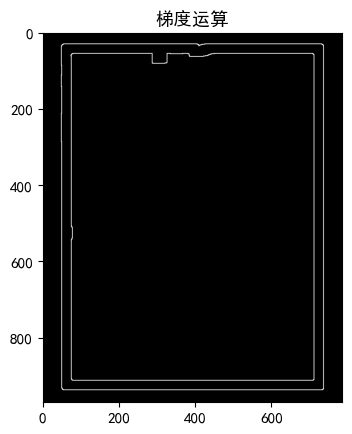

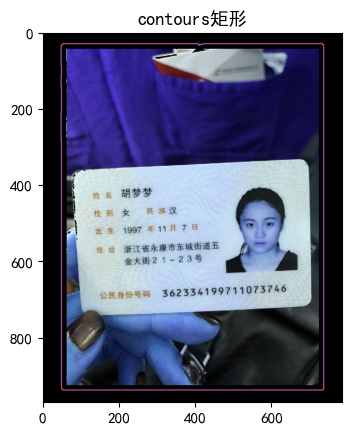

TypeError: Invalid shape (0,) for image data

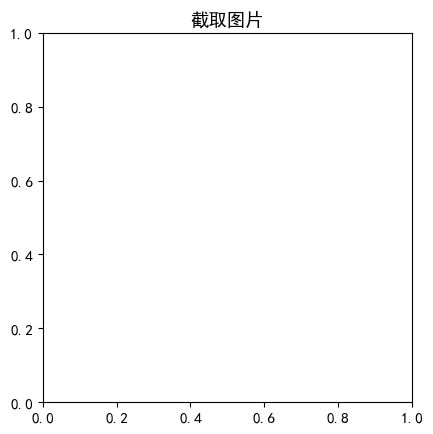

In [73]:
import random
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from cnocr import CnOcr
from utils.common import show,fillColor
import re
def clearBorder(img):
    # 将图像转为灰度图像
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lower = np.array([245])
    upper = np.array([255])
    mask = cv2.inRange(gray, lower, upper)
    img[mask == 255] = [0, 0, 0]
    return img
def getIdcard(ori_img,debug=False):
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
    matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    show(ori_img,"原始图",debug=debug)
    ori_img=clearBorder(ori_img)
    show(ori_img,"除白边原始图",debug=debug)
    #使用第一个像素点填充10%大屏到外围，防止图片边框没有闭合
    rgb = ori_img[0, 0]
    img = fillColor(ori_img, [0, 0, 0])
    #img = fillColor(ori_img, [int(rgb[0]), int(rgb[1]), int(rgb[2])])
    show(img,"填充图",cmap="gray",debug=debug)
    #%%
    #转换成灰度图
    grayImg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    show(grayImg,"灰度图",cmap="gray",debug=debug)
    grayImg=cv2.medianBlur(grayImg,9)
    _,grayImg=cv2.threshold(grayImg,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    show(grayImg, "二值化图",cmap="gray",debug=debug)
    # grayImg=cv2.GaussianBlur(grayImg,(5,5),0,0)
    show(grayImg,"高斯降噪图",cmap="gray",debug=debug)
    canny = cv2.Canny(grayImg, 100, 150)
    show(canny,"canny边框图",cmap="gray",debug=debug)
    kernel = np.ones((3, 3), np.uint8)
    dilate = cv2.dilate(canny, kernel, iterations=12)
    show(dilate, "膨胀",cmap="gray",debug=debug)
    dst = cv2.morphologyEx(dilate, cv2.MORPH_GRADIENT, kernel)
    show(dst,"梯度运算",cmap="gray",debug=True)
    contours, hierarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_copy = img.copy()
    # 遍历所有轮廓
    for contour in contours:
        # 近似轮廓形状
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        if len(approx)==len(approx):
            r = random.randint(0, 255)
            g = random.randint(0, 255)
            b = random.randint(0, 255)
            
            rgb = (r, g, b)
            # 如果近似后的形状是四边形，认为它是疑似长方形的边框
            cv2.drawContours(image_copy, [contour], 0, rgb, 2)
    show(image_copy, "contours矩形",debug=debug)
    return []
img=cv2.imread("./images/5.jpg")
#截取到最终的图片
roi=getIdcard(img,True)
plt.title("截取图片")
plt.imshow(roi)
plt.show()